# Import all depedencies 

In [296]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install pyrenn

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-6lheeflf
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-6lheeflf
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=7550c1e1c78ddd35d609f50810fe8a5295a64526feaec49092ebddc6abf72550
  Stored in directory: /tmp/pip-ephem-wheel-cache-n4yzw8l3/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg


In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
import pywt
import tensorflow as tf
from numpy.random import seed
seed(11)
tf.random.set_seed(29)
import pyeeg
import pyrenn as prn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# Download Dataset

In [298]:
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip

!mkdir './Non-Seizure'
!mkdir './Non-Seizure/Set A'
!mkdir './Non-Seizure/Set B'
!mkdir './Non-Seizure/Set C'
!mkdir './Non-Seizure/Set D'

!mkdir './Seizure'
!mkdir './Seizure/Set E'

!unzip -q Z.zip -d './Non-Seizure/Set A'
!unzip -q O.zip -d './Non-Seizure/Set B'
!unzip -q N.zip -d './Non-Seizure/Set C'
!unzip -q F.zip -d './Non-Seizure/Set D'
!unzip -q NS.zip -d './Seizure/Set E'  

--2021-03-04 20:22:27--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘Z.zip.2’

Z.zip.2             100%[===================>] 564.50K   355KB/s    in 1.6s    

2021-03-04 20:22:30 (355 KB/s) - ‘Z.zip.2’ saved [578047/578047]

--2021-03-04 20:22:30--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘O.zip.2’

O.zip.2             100%[===================>] 611.30K   385KB/s    in 1.6s    

2021-03-04 20:22:32 (385 KB/s) - ‘O.zip.2’ s

# Load files from folders 

In [357]:
# import each and every file


dirA="./Non-Seizure/Set A/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)          # class: 0     val: 0

dirB="./Non-Seizure/Set B/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)          # class: 0     val: 0

dirC="./Non-Seizure/Set C/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)          # class:0       val: 0
    
dirD="./Non-Seizure/Set D/"
tempD = []
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)          # class: 0        val: 0

dirE="./Seizure/Set E/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)          # class: 1     val:  1

# Create small tables 

In [358]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_csv(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_csv(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_csv(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_csv(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_csv(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

# Make big tables

In [359]:
def table(table):
    big_table = None
    for tf in table:
        big_table = pd.concat([big_table, tf],axis=1)
    return big_table

In [360]:
bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigD = table(td)
bigE = table(te)

head = list(bigE.columns.values)

In [361]:
print(len(bigE.axes[0]))
print(len(bigE.axes[1]))

4097
100


In [362]:
bigE.head(10)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A60,A61,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,100,340,-310,84,343,-88,176,661,-377,374,142,457,746,-63,-174,-115,800,-46,-501,1,213,-54,27,-40,-445,231,-782,-345,59,475,-156,-9,216,-18,-458,258,530,264,-71,284,...,-192,249,224,22,-300,-358,555,-114,68,-62,61,271,-133,-21,45,-985,122,-177,-459,249,235,-127,-34,-24,184,43,286,80,151,134,-129,-26,308,-155,-113,-40,187,-438,-476,23
1,124,353,93,75,311,-115,186,721,-379,-205,262,420,692,-107,-392,-117,839,-43,-540,-47,210,-26,55,-187,-645,214,-1221,-166,37,501,-74,68,182,-55,-669,309,523,372,-83,358,...,-207,218,199,-67,-334,-378,611,-248,-106,-87,42,291,-181,-17,51,-594,117,-237,-778,235,168,-164,-11,-29,-160,59,251,86,25,390,-309,1,367,-283,-185,-58,44,-561,-518,144
2,153,400,494,21,284,-140,189,702,-396,-871,382,344,562,-208,-470,-127,857,-37,-523,-100,210,20,75,-254,-652,187,-1406,91,25,477,51,195,146,-126,-914,308,424,410,-95,122,...,-202,176,149,-184,-341,-365,658,-388,-149,-129,23,267,-166,-16,62,-120,116,-266,-981,220,113,-184,8,-17,-569,69,214,91,-82,446,-432,29,413,-456,-269,-75,-147,-622,-521,228
3,185,470,789,-68,274,-159,198,628,-448,-1325,451,272,400,-310,-398,-142,876,-32,-489,-192,212,58,90,-287,-562,141,-1288,326,18,403,134,207,128,-202,-999,271,285,382,-88,-114,...,-202,137,67,-281,-342,-338,703,-484,-141,-169,-1,196,-46,-15,72,308,110,-286,-1048,286,97,-209,-42,-5,-758,73,195,100,-134,329,-412,41,429,-541,-328,-88,-368,-581,-362,260
4,210,538,798,-138,260,-164,205,519,-476,-1291,452,198,238,-395,-259,-158,893,-18,-539,-252,194,83,102,-309,-496,82,-944,448,16,303,208,265,116,-238,-846,199,157,323,-48,-311,...,-139,88,-37,-410,-306,-296,711,-565,-109,-208,-23,55,131,-9,82,620,101,-301,-734,424,97,-223,-131,0,-610,65,181,107,-102,49,-278,33,400,-474,-312,-89,-550,-460,-68,255
5,220,590,552,-184,237,-161,213,394,-439,-721,435,122,84,-491,-136,-167,928,-8,-768,-277,162,97,109,-300,-442,37,-548,470,17,186,291,187,109,-226,-566,100,64,255,5,-319,...,-39,21,-133,-414,-214,-282,670,-559,-69,-241,-49,-56,262,-9,86,644,91,-296,-183,549,120,-261,-199,13,-259,39,173,116,0,-123,-82,2,341,-389,-235,-81,-657,-295,175,218
6,216,611,202,-197,165,-144,223,308,-329,14,544,35,-36,-463,-50,-170,973,6,-998,-268,121,109,111,-222,-375,18,-242,436,19,87,320,102,110,-171,-323,-4,-38,184,58,-209,...,46,-49,-193,-409,-22,-274,586,-477,-74,-275,-64,-174,309,-13,101,538,79,-273,478,600,152,-307,-217,13,160,-1,164,127,106,-167,94,-31,286,-288,-137,-67,-665,-164,289,178
7,222,629,-95,-186,-33,-123,231,226,-203,586,562,-69,-137,-426,19,-168,1045,12,-1156,-216,84,120,108,-37,-293,7,-19,434,23,43,306,31,110,-111,4,-95,-67,126,82,-65,...,61,-48,-206,-298,194,-261,450,-284,-93,-295,-72,-227,284,-35,113,320,59,-229,1040,515,155,-411,-200,6,418,-42,141,153,205,-141,201,-60,285,-233,-56,-52,-581,-70,184,126
8,240,649,-262,-155,-271,-93,234,145,-214,911,462,-168,-211,-275,85,-165,1012,19,-1009,-153,45,130,97,136,-218,-18,117,487,17,79,262,-11,112,-73,0,-149,-79,74,92,78,...,7,18,-197,-168,352,-222,317,-11,-110,-293,-60,-224,237,-97,144,116,43,-175,1381,400,159,-444,-150,-11,565,-73,96,207,259,-73,180,-81,333,-150,-1,-28,-442,3,15,60
9,265,693,-327,-111,-425,-59,236,64,-300,914,182,-258,-253,-114,146,-162,937,26,-665,-111,11,135,67,467,-146,-55,182,552,19,181,201,-24,98,-48,-115,-179,-76,37,90,196,...,-155,163,-164,-28,416,-168,129,313,-103,-299,-40,-207,173,-175,211,-62,25,-115,1502,240,200,-323,-104,-23,619,-97,20,258,276,46,31,-99,416,-43,30,14,-290,66,-130,6


# Create sub matrix for each

In [363]:
# create a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [364]:
matA = creat_mat(bigA)
matB = creat_mat(bigB) # : refers to NON-SEIZURE
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) # :  refers to SEIZURES

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

In [365]:
matB.shape

(4097, 100)

In [366]:
matNS_out = np.zeros((1,400)) # labels for non-seizure data = 0

matNS = np.concatenate((matA, matB, matC, matD), axis= 1)

X_data_NS = np.concatenate((matNS,matNS_out), axis = 0) 
print(X_data_NS.shape) # Non-seizure data

(4098, 400)


In [309]:
matS_out = np.ones((1,100)) # labels for seizure data = 1
X_data_S = np.concatenate((matE,matS_out), axis = 0) 
print(X_data_S.shape) # Seizure data

(4098, 100)


In [310]:
data = np.concatenate((X_data_NS,X_data_S), axis =1)
data = data.T
c = 'A'
col = []
sig = []
for i in range(np.size(data,1)-1):
    col.append(st+str(i))
for i in range(np.size(data,0)):
    sig.append('S'+str(i))
col.append('out')
TotalData = pd.DataFrame(data, columns=col, index= sig)

In [311]:
TotalData

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A4058,A4059,A4060,A4061,A4062,A4063,A4064,A4065,A4066,A4067,A4068,A4069,A4070,A4071,A4072,A4073,A4074,A4075,A4076,A4077,A4078,A4079,A4080,A4081,A4082,A4083,A4084,A4085,A4086,A4087,A4088,A4089,A4090,A4091,A4092,A4093,A4094,A4095,A4096,out
S0,12.0,22.0,35.0,45.0,69.0,74.0,79.0,78.0,66.0,43.0,33.0,36.0,34.0,38.0,36.0,28.0,6.0,-19.0,-38.0,-45.0,-35.0,-11.0,6.0,7.0,7.0,-2.0,-3.0,5.0,19.0,26.0,25.0,41.0,46.0,52.0,50.0,47.0,38.0,24.0,17.0,3.0,...,48.0,36.0,15.0,-6.0,-1.0,8.0,26.0,38.0,32.0,33.0,34.0,41.0,42.0,30.0,16.0,13.0,6.0,-2.0,-10.0,-23.0,-31.0,-23.0,-1.0,19.0,17.0,7.0,-17.0,-32.0,-37.0,-31.0,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0,77.0,0.0
S1,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,-114.0,-115.0,-126.0,-138.0,-143.0,-126.0,-91.0,-57.0,-62.0,-91.0,-125.0,-153.0,-154.0,-147.0,-136.0,-143.0,-147.0,-153.0,-171.0,-187.0,-175.0,-141.0,-96.0,-47.0,-40.0,-55.0,-74.0,-79.0,-89.0,-94.0,-107.0,-124.0,-134.0,...,-134.0,-138.0,-136.0,-144.0,-141.0,-146.0,-141.0,-117.0,-67.0,-20.0,5.0,17.0,-5.0,-31.0,-75.0,-119.0,-160.0,-201.0,-214.0,-220.0,-206.0,-187.0,-162.0,-139.0,-118.0,-77.0,-49.0,-37.0,-43.0,-63.0,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0,-82.0,0.0
S2,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,14.0,31.0,31.0,20.0,2.0,0.0,2.0,12.0,23.0,20.0,18.0,17.0,34.0,43.0,47.0,30.0,5.0,-28.0,-27.0,-19.0,-24.0,-27.0,-35.0,-40.0,-42.0,-46.0,-41.0,-33.0,-14.0,3.0,8.0,-3.0,-10.0,...,72.0,80.0,66.0,37.0,-6.0,-47.0,-70.0,-85.0,-88.0,-89.0,-91.0,-101.0,-108.0,-103.0,-104.0,-96.0,-84.0,-65.0,-43.0,-18.0,-5.0,-5.0,-14.0,-30.0,-58.0,-88.0,-116.0,-129.0,-117.0,-91.0,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0,82.0,0.0
S3,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,7.0,-12.0,-42.0,-53.0,-62.0,-31.0,-19.0,-14.0,5.0,-2.0,-31.0,-68.0,-108.0,-92.0,-76.0,-41.0,-41.0,15.0,59.0,99.0,114.0,75.0,25.0,-13.0,-2.0,16.0,33.0,48.0,21.0,-12.0,-51.0,-82.0,-67.0,...,16.0,18.0,20.0,23.0,32.0,38.0,35.0,-3.0,-34.0,-45.0,-50.0,-12.0,26.0,68.0,85.0,55.0,38.0,32.0,23.0,21.0,-9.0,-28.0,-46.0,-76.0,-91.0,-86.0,-67.0,-56.0,-22.0,-32.0,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0,33.0,0.0
S4,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,23.0,24.0,31.0,38.0,35.0,41.0,44.0,44.0,26.0,11.0,-4.0,-25.0,-32.0,-27.0,-32.0,-31.0,-23.0,-19.0,3.0,24.0,44.0,31.0,11.0,16.0,14.0,15.0,-11.0,-47.0,-49.0,-43.0,...,-28.0,-52.0,-37.0,-27.0,-8.0,0.0,6.0,8.0,18.0,19.0,8.0,5.0,2.0,14.0,6.0,2.0,-7.0,4.0,24.0,41.0,35.0,12.0,4.0,12.0,7.0,-7.0,-2.0,-6.0,-3.0,1.0,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S495,-40.0,-58.0,-75.0,-88.0,-89.0,-81.0,-67.0,-52.0,-28.0,14.0,67.0,114.0,148.0,158.0,161.0,147.0,119.0,68.0,8.0,-42.0,-79.0,-106.0,-104.0,-98.0,-93.0,-93.0,-108.0,-126.0,-142.0,-143.0,-127.0,-99.0,-69.0,-40.0,-25.0,-20.0,-17.0,-24.0,-37.0,-53.0,...,-25.0,-50.0,-64.0,-76.0,-77.0,-87.0,-101.0,-119.0,-146.0,-170.0,-193.0,-206.0,-209.0,-201.0,-185.0,-169.0,-164.0,-155.0,-144.0,-134.0,-135.0,-155.0,-185.0,-220.0,-221.0,-181.0,-115.0,-43.0,8.0,32.0,32.0,32.0,18.0,6.0,-3.0,-10.0,-13.0,-16.0,-151.0,1.0
S496,187.0,44.0,-147.0,-368.0,-550.0,-657.0,-665.0,-581.0,-442.0,-290.0,-151.0,-61.0,10.0,74.0,149.0,213.0,262.0,291.0,306.0,311.0,326.0,359.0,399.0,407.0,391.0,332.0,223.0,96.0,-84.0,-305.0,-509.0,-667.0,-709.0,-660.0,-536.0,-392.0,-247.0,-134.0,-61.0,19.0,...,575.0,412.0,117.0,-275.0,-672.0,-957.0,-1044.0,-997.0,-877.0,-719.0,-544.0,-374.0,-245.0,-157.0,-94.0,-26.0,39.0,119.0,181.0,237.0,278.0,315.0,342.0,366.0,385.0,399.0,409.0,415.0,428.0,463.0,510.0,562.0,607.0,667.0,748.0,763.0,703.0,446.0,-537.0,1.0
S497,-438.0

In [312]:
df = TotalData.drop(['out'], axis =1)
target = TotalData['out']

# VISUALISING THE DATA POINTS

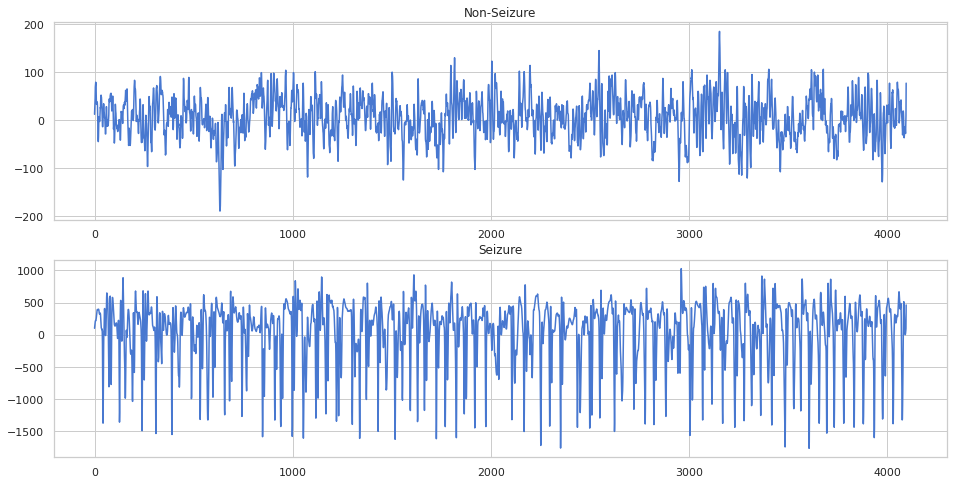

In [313]:
samples = np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Non-Seizure')
plt.plot(samples,matNS[:,0], label = 'Non-Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label= 'Seizure')
plt.savefig('ns.png')
plt.show()

#Applying wavelet transform

##Decomposition of signal into sub-bands

In [314]:
final_values = []

In [315]:
#filters = pywt.wavelist('db')
filters = pywt.wavelist('bior')
print(filters)
print(len(filters))
level =1 #2 #3 #4  
w_name = 'bior2.8' # chosen by experiments
#w_name = 'db10'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
15


In [316]:
w = pywt.Wavelet(w_name)
temp_cA = []
temp_cD1 = []
for i in matNS.T:
  cA,cD1 = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA.append(cA)
  temp_cD1.append(cD1)

coeff_cA = np.array(temp_cA)
coeff_cD1 = np.array(temp_cD1)

In [317]:
w = pywt.Wavelet(w_name)
temp_cA_S = []
temp_cD1_S = []
for i in matE.T:
  cA_S,cD1_S = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_S.append(cA_S)
  temp_cD1_S.append(cD1_S)
  
coeff_cA_S = np.array(temp_cA_S)
coeff_cD1_S = np.array(temp_cD1_S)

In [318]:
print(len(coeff_cA_S[0]))
print(coeff_cD1_S.shape)
print(coeff_cA.shape)
print(coeff_cD1.shape)

2057
(100, 2057)
(400, 2057)
(400, 2057)


In [319]:
coeff_cA_total = np.concatenate([coeff_cA, coeff_cA_S])
coeff_cD1_total = np.concatenate([coeff_cD1, coeff_cD1_S])

## Visualizing the sub-bands

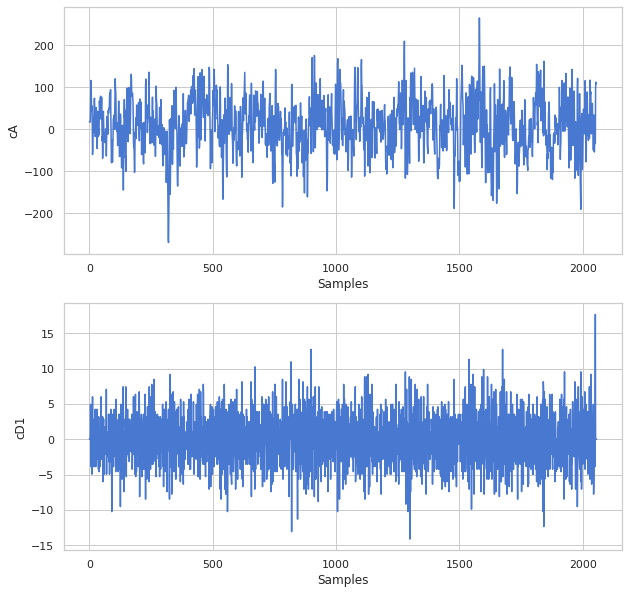

In [320]:

plt.figure(figsize=(10,10))
plt.subplot(level+1,1,1)
plt.ylabel('cA')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cA[0]),1),coeff_cA[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('cD1')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD1[0]),1),coeff_cD1[0,:].T)

plt.show()

# Feature extraction

## SVD_Entropy, Fisher_Information, PFD

In [321]:
help(pyeeg.svd_entropy)

help(pyeeg.fisher_info)

help(pyeeg.pfd)

Help on function svd_entropy in module pyeeg.entropy:

svd_entropy(X, Tau, DE, W=None)
    Compute SVD Entropy from either two cases below:
    1. a time series X, with lag tau and embedding dimension dE (default)
    2. a list, W, of normalized singular values of a matrix (if W is provided,
    recommend to speed up.)
    
    If W is None, the function will do as follows to prepare singular spectrum:
    
        First, computer an embedding matrix from X, Tau and DE using pyeeg
        function embed_seq():
                    M = embed_seq(X, Tau, DE)
    
        Second, use scipy.linalg function svd to decompose the embedding matrix
        M and obtain a list of singular values:
                    W = svd(M, compute_uv=0)
    
        At last, normalize W:
                    W /= sum(W)
    
    Notes
    -------------
    
    To speed up, it is recommended to compute W before calling this function
    because W may also be used by other functions whereas computing it here
  

In [322]:
# source: https://www.hindawi.com/journals/cin/2011/406391/

def build_features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
    #DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    #Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    #mean               = np.mean(mat)
    #p , p_ratio = pyeeg.bin_power(mat, Band, Fs)
    #Spectral_Entropy   = pyeeg.spectral_entropy(mat, Band, Fs, Power_Ratio=p_ratio)
    sleep(0.01)
    
    return (SVD_Entropy,HFD,PFD)

## Compute the features of dataset
A binary classification for epilectic seizures where class 1 is Non-Seizure class having value (01) and class 2 is Siezure class having value (10)

In [323]:
# create features of class I and cA
f1_cA_NS    = np.zeros((400,1))
f2_cA_NS    = np.zeros((400,1))
f3_cA_NS    = np.zeros((400,1))
#f4_cA_NS    = np.zeros((400,1))
#f5_cA_NS    = np.zeros((400,1))
#f6_cA_NS    = np.zeros((400,1))
#f7_cA_NS    = np.zeros((400,1))

for i in range(400):
    [f1_cA_NS[i,0],f2_cA_NS[i,0],f3_cA_NS[i,0]]=build_features(coeff_cA.T[:,i])


# create features of class I and cD1
f1_cD1_NS    = np.zeros((400,1))
f2_cD1_NS    = np.zeros((400,1))
f3_cD1_NS    = np.zeros((400,1))
#f4_cD1_NS    = np.zeros((400,1))
#f5_cD1_NS    = np.zeros((400,1))
#f6_cD1_NS    = np.zeros((400,1))
#f7_cD1_NS    = np.zeros((400,1))


for i in range(400):
    [f1_cD1_NS[i,0],f2_cD1_NS[i,0],f3_cD1_NS[i,0]]=build_features(coeff_cD1.T[:,i])
   

/usr/local/lib/python3.7/dist-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, _, _, _) = numpy.linalg.lstsq(x, L)


In [324]:
# create features of class II (SEIZURE and cA)
f1_cA_S    = np.zeros((100,1))
f2_cA_S    = np.zeros((100,1))
f3_cA_S    = np.zeros((100,1))
#f4_cA_S    = np.zeros((100,1))
#f5_cA_S    = np.zeros((100,1))
#f6_cA_S    = np.zeros((100,1))
#f7_cA_S    = np.zeros((100,1))

for i in range(100):
    [f1_cA_S[i,0],f2_cA_S[i,0],f3_cA_S[i,0]]=build_features(coeff_cA_S.T[:,i])

# create features of class II (SEIZURE and cD1)
f1_cD1_S    = np.zeros((100,1))
f2_cD1_S    = np.zeros((100,1))
f3_cD1_S    = np.zeros((100,1))
#f4_cD1_S    = np.zeros((100,1))
#f5_cD1_S    = np.zeros((100,1))
#f6_cD1_S    = np.zeros((100,1))
#f7_cD1_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD1_S[i,0],f2_cD1_S[i,0],f3_cD1_S[i,0]]=build_features(coeff_cD1_S.T[:,i])
    

/usr/local/lib/python3.7/dist-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, _, _, _) = numpy.linalg.lstsq(x, L)


In [325]:
cl_2_NS    = np.ones((400,1))
cl_2_S = np.zeros((100,1))
cl_1_S    = np.ones((100,1))
cl_1_NS = np.zeros((400,1))

## Create feature and class matrix

In [326]:
MftNS = np.concatenate([f1_cA_NS, f2_cA_NS, f3_cA_NS, f1_cD1_NS, f2_cD1_NS, f3_cD1_NS, cl_1_NS, cl_2_NS], axis=1)
MftS =  np.concatenate([f1_cA_S, f2_cA_S, f3_cA_S, f1_cD1_S, f2_cD1_S, f3_cD1_S, cl_1_S, cl_2_S], axis=1)


In [327]:
FCM_NS = pd.DataFrame(MftNS,columns=['f1','f2','f3','f4','f5', 'f6','class1', 'class2'])
FCM_S  = pd.DataFrame(MftS ,columns=['f1','f2','f3','f4','f5', 'f6', 'class1', 'class2'])

In [328]:
FCM_NS.head(4)

,f1,f2,f3,f4,f5,f6,class1,class2
0,2.275465,0.485644,0.567704,2.292872,1.013834,0.549972,0.0,1.0
1,2.169776,0.542155,0.565683,2.300902,0.992132,0.551389,0.0,1.0
2,2.260150,0.491075,0.569522,2.295192,0.972433,0.551453,0.0,1.0
3,2.295099,0.665832,0.561561,2.300800,0.963113,0.551517,0.0,1.0


In [329]:
FCM_S.head(4)

,f1,f2,f3,f4,f5,f6,class1,class2
0,2.289902,0.457318,0.580238,2.300220,0.807048,0.562122,1.0,0.0
1,2.276536,0.581010,0.574348,2.287781,0.895353,0.558017,1.0,0.0
2,2.290521,0.577574,0.575393,2.285398,0.927635,0.558289,1.0,0.0
3,2.212240,0.272422,0.584263,2.294218,0.858520,0.561518,1.0,0.0


In [330]:
TotalDataset = pd.concat([FCM_NS,FCM_S],ignore_index=True)

visDat = TotalDataset.drop(["class2"],axis=1)
visDat['class1'] = visDat['class1'].map({1:'seizure',0:'Non-Seizure'})

In [331]:
print(TotalDataset.shape)

(500, 8)


## Kruskal-Wallis H-test 

In [332]:
f = ['cA', 'cD1']
H = []
pval = []
from scipy.stats import mstats

for i in range(0,3*(level+1), 3):
  #print(i)
  print("Kruskal Wallis H-test test:")
  h, p = mstats.kruskalwallis(MftNS[:,i], MftS[:,i])
  H.append(h)
  pval.append(p)
  #print(int(i/(level+1)))
  if  pval[int(i/(level+1))] < 0.05:
      print("Reject NULL hypothesis - Significant differences exist between groups.")
  if  pval[int(i/(level+1))] > 0.05:
      print("Accept NULL hypothesis - No significant difference between groups.")

H = np.array(H)
pval = np.array(pval)
P_Table = np.concatenate([H.reshape(len(H),1), pval.reshape(len(pval),1)], axis = 1)
P_Tables = pd.DataFrame(P_Table, columns = ['H-value', 'P-Value'], index = f)

Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.


In [333]:
P_Tables

,H-value,P-Value
cA,21.838037,0.000003
cD1,6.505159,0.010756


##Visualizing the features

In [334]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")
visDat.head(5)

,f1,f2,f3,f4,f5,f6,class1
0,2.275465,0.485644,0.567704,2.292872,1.013834,0.549972,Non-Seizure
1,2.169776,0.542155,0.565683,2.300902,0.992132,0.551389,Non-Seizure
2,2.260150,0.491075,0.569522,2.295192,0.972433,0.551453,Non-Seizure
3,2.295099,0.665832,0.561561,2.300800,0.963113,0.551517,Non-Seizure
4,2.238368,0.526752,0.565254,2.299762,0.957821,0.550407,Non-Seizure


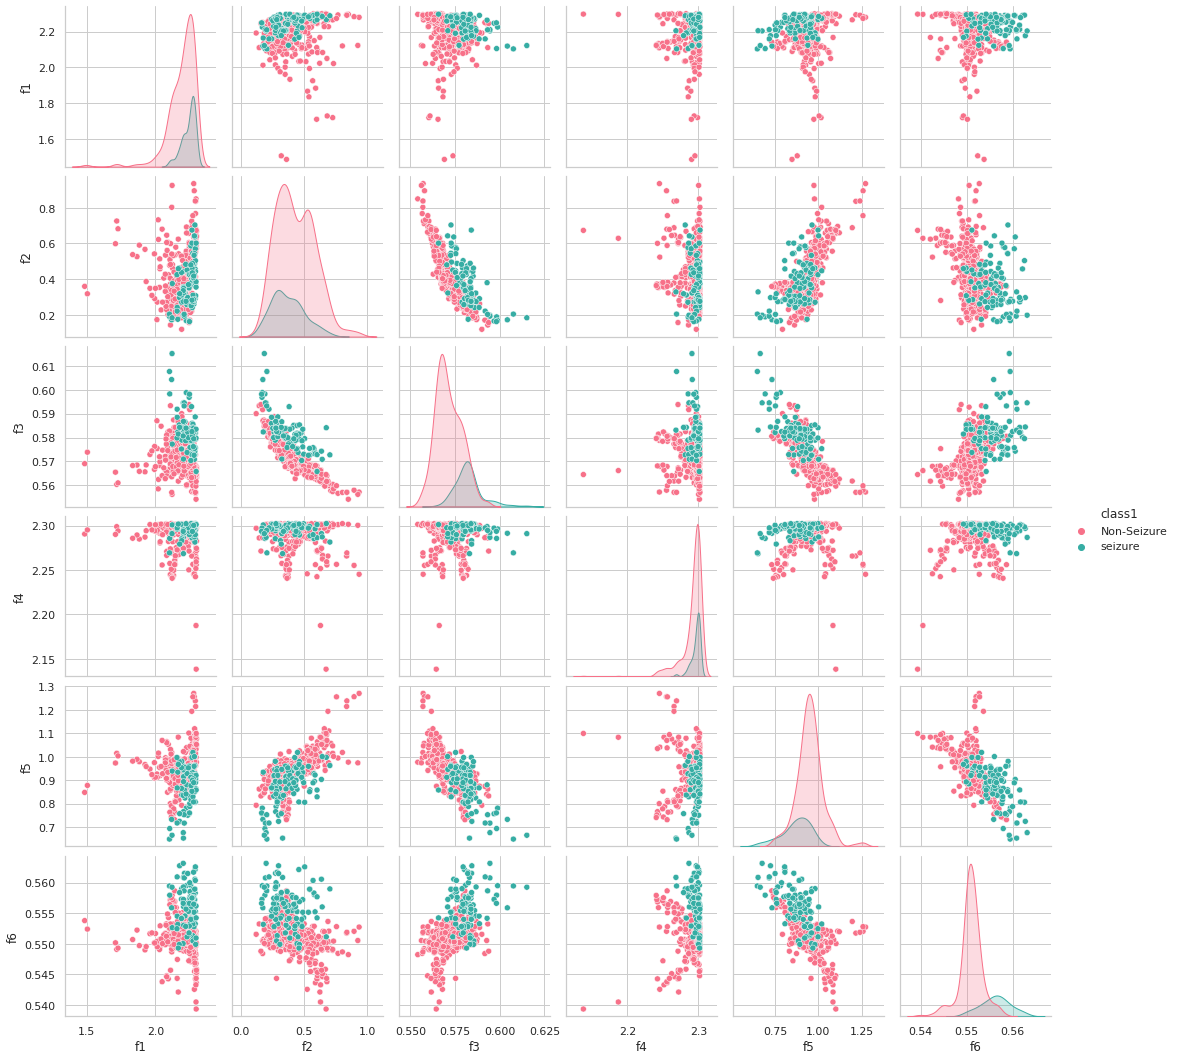

In [335]:
sbn.pairplot(visDat,hue='class1',palette="husl")
plt.show()

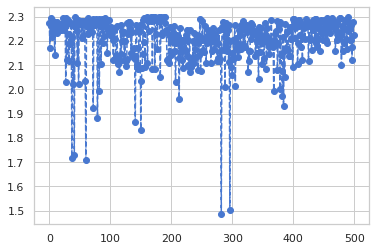

In [336]:
plt.plot(visDat['f1'],'--o')

#Splitting the dataset

In [367]:
from sklearn.model_selection import train_test_split

In [368]:
X = TotalDataset[['f1','f2','f3','f4','f5', 'f6']]
y = TotalDataset[['class1', 'class2']]
X = np.asarray(X)
y = np.asarray(y)


In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [340]:
print(X_train)

[[ 0.17061874  0.58559689 -1.04461819  0.59791516 -0.64955981  0.37284861]
 [ 0.87985096  0.55801638 -0.09055869  0.64823771 -0.47288958  0.66131481]
 [ 0.71256409  1.86193592 -1.49100133  0.30289565  0.95344297 -0.86247036]
 ...
 [ 0.00655502 -0.72561969  0.54649489  0.3370425  -0.10216177 -0.50934541]
 [ 0.03299362 -1.43006578  2.35225966 -0.34213748 -2.95350061  3.22684047]
 [ 0.46558995  0.24677281 -0.35482221  0.04259303  0.38439995 -0.02145896]]


#Applying Artificial Neural Networks
A trained neural network with ten hidden neurons and a single hidden layer is employed to identify the class of a given EEG signal from its features obtained. The ANN consists of linear activation functions and hyperbolic tangent function in its output and hidden layer respectively. The neural network training algorithm used is Levenberg-Marquardt backpropagation algorithm. The output layer consists of two nodes defining each class.

##Training the network

In [370]:
net = prn.CreateNN([6,10,2])
net = prn.train_LM(X_train.T,y_train.T,net,verbose=True,k_max=100,E_stop=1e-5)
y_pred_temp = prn.NNOut(X_test.T,net)
y_pred_temp = y_pred_temp.T

Iteration:  0 		Error:  319.73094997631864 	scale factor:  3.0
Iteration:  1 		Error:  65.74208159679063 	scale factor:  0.3
Iteration:  2 		Error:  44.90770294607489 	scale factor:  0.3
Iteration:  3 		Error:  37.1469726986794 	scale factor:  0.3
Iteration:  4 		Error:  32.523447234084216 	scale factor:  0.3
Iteration:  5 		Error:  29.67264836177721 	scale factor:  0.03
Iteration:  6 		Error:  22.301862984902648 	scale factor:  0.03
Iteration:  7 		Error:  20.861173346553976 	scale factor:  0.03
Iteration:  8 		Error:  19.854071083299786 	scale factor:  0.03
Iteration:  9 		Error:  18.97746524346256 	scale factor:  0.03
Iteration:  10 		Error:  18.312832389242004 	scale factor:  0.03
Iteration:  11 		Error:  17.72626594116829 	scale factor:  0.03
Iteration:  12 		Error:  17.127584266618886 	scale factor:  0.03
Iteration:  13 		Error:  16.468930377822538 	scale factor:  0.03
Iteration:  14 		Error:  15.871057012339143 	scale factor:  0.03
Iteration:  15 		Error:  15.387702773433729 	sc

In [342]:
print(y_pred_temp)

[[-3.01392538e-02  1.03013925e+00]
 [-1.94704756e-03  1.00194705e+00]
 [-1.59935364e-02  1.01599354e+00]
 [-2.19041927e-02  1.02190419e+00]
 [ 1.14446350e-02  9.88555365e-01]
 [ 2.72373872e-02  9.72762613e-01]
 [ 1.84537162e-02  9.81546284e-01]
 [-7.46470177e-02  1.07464702e+00]
 [ 4.27401057e-03  9.95725989e-01]
 [ 9.47899104e-01  5.21008959e-02]
 [ 7.69891679e-03  9.92301083e-01]
 [-4.85196819e-02  1.04851968e+00]
 [ 1.02731881e+00 -2.73188125e-02]
 [-4.79801975e-04  1.00047980e+00]
 [-1.60388485e-02  1.01603885e+00]
 [ 4.37241987e-02  9.56275801e-01]
 [ 9.29621437e-01  7.03785627e-02]
 [-1.13116616e-03  1.00113117e+00]
 [-3.57583700e-01  1.35758370e+00]
 [ 9.95413571e-01  4.58642945e-03]
 [ 9.99451616e-01  5.48383687e-04]
 [ 8.89978999e-01  1.10021001e-01]
 [ 9.17686061e-03  9.90823139e-01]
 [-5.70655723e-02  1.05706557e+00]
 [-7.75422469e-04  1.00077542e+00]
 [ 9.05321964e-01  9.46780355e-02]
 [ 9.78251537e-01  2.17484626e-02]
 [-1.31069582e-02  1.01310696e+00]
 [-5.66754747e-03  1

In [371]:
Y_pred = np.zeros((100,1))
for i in range(100):
  Y_pred[i] = np.argmax(y_pred_temp[i,:])

Y_test = np.zeros((100,1))
for i in range(100):
  Y_test[i] = np.argmax(y_test[i,:])


In [344]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


##Create Confusion Matrix

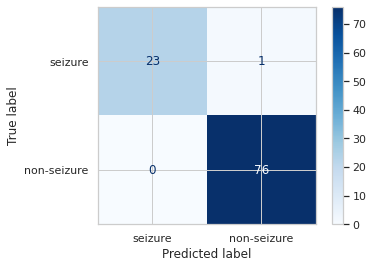

[[23  1]
 [ 0 76]]
0.99


In [372]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm_ann = confusion_matrix(Y_test, Y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann,
                              display_labels=['seizure' , 'non-seizure'])

#ax = plt.figure(figsize=(8,10))
# NOTE: Fill all variables here with default values of the plot_confusion_matrix

disp = disp.plot(cmap='Blues')

plt.show()
print(cm_ann)
val = accuracy_score(Y_test, Y_pred)
print(val)

##Visualizing ROC Curve


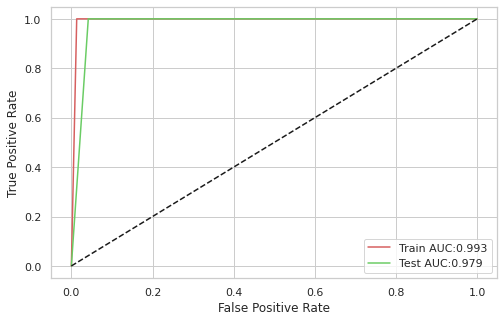

In [393]:
from sklearn.metrics import roc_curve,roc_auc_score

Y_train_pred = prn.NNOut(X_train.T,net)
Y_train_pred = Y_train_pred.T

Y_train_pred_ = np.zeros((400,1))
for i in range(400):
  Y_train_pred_[i] = np.argmax(Y_train_pred[i,:])

y_train_ = np.zeros((400,1))
for i in range(400):
  y_train_[i] = np.argmax(y_train[i,:])


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_, Y_train_pred_)
auc_train = roc_auc_score(y_train_, Y_train_pred_)

fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_pred)
auc_test = roc_auc_score(Y_test, Y_pred)

plt.figure(figsize=(8,5))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Apply ANN  using Tensorflow
Apply ANN using Tensorflow and ADAM backpropagation Algorithm with sigmoid activation function in the output layer

##Training the neural network

In [374]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train[:,0], batch_size = 32, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6993
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.7737
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7605
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.8264
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.8312
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.8088
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.8266
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8796
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8559
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8805
Epoch 11/

In [375]:
Y_pred_tf = ann.predict(X_test)
Y_pred_tf = (Y_pred_tf > 0.5)
Y_train_pred_tf = ann.predict(X_train)
Y_train_pred_tf = (Y_train_pred_tf > 0.5)

##Create confusion matrix

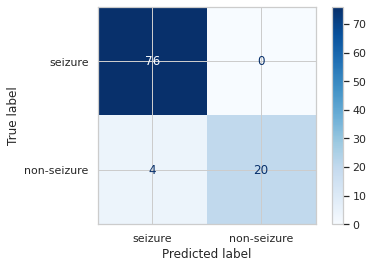

[[76  0]
 [ 4 20]]
0.96


In [376]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm_ann = confusion_matrix(y_test[:,0], Y_pred_tf)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann,
                              display_labels=['seizure' , 'non-seizure'])

disp = disp.plot(cmap='Blues')

plt.show()
print(cm_ann)
accuracy_score(y_test[:,0], Y_pred_tf)
print(accuracy_score(y_test[:,0], Y_pred_tf))

##Visualizing ROC curve


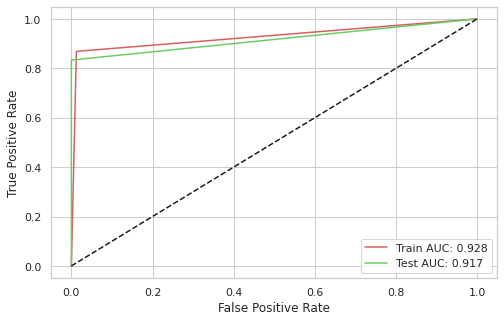

<function print>

In [377]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_train_tf, tpr_train_tf, thresholds_train_tf = roc_curve(y_train[:,0], Y_train_pred_tf)
auc_train_tf = roc_auc_score(y_train[:,0], Y_train_pred_tf)

fpr_test_tf, tpr_test_tf, thresholds_test_tf = roc_curve(y_test[:,0], Y_pred_tf)
auc_test_tf = roc_auc_score(y_test[:,0], Y_pred_tf)

plt.figure(figsize=(8,5))
plt.plot(fpr_train_tf, tpr_train_tf, 'r-',label ='Train AUC: %.3f'%auc_train_tf)
plt.plot(fpr_test_tf, tpr_test_tf, 'g-',label ='Test AUC: %.3f'%auc_test_tf)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print

# OTHER MACHINE LEARNING MODELS:


I tried this part both with 7 features used in the other notebook, namely: DFA,HFD,SVD_Entropy, Spectral_Entropy, Fisher_Information,PFD, mean; and 3 features that have better accuracy for this notebook classifiers, namely: SVD_Entropy, Fisher_Information, and PFD. The difference is that in this notebook the signals are decomposed to descrete wavelets.

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [379]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Multi-layer Perceptron", "AdaBoost",
         "Naive Bayes", "QDA"]

In [380]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [381]:
clf_score=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train[:,0])
        score = clf.score(X_test, y_test[:, 0])
        clf_score.append([score,name])

In [382]:
clf_score

[[0.94, 'Nearest Neighbors'],
 [0.94, 'Linear SVM'],
 [0.9, 'RBF SVM'],
 [0.97, 'Gaussian Process'],
 [0.95, 'Decision Tree'],
 [0.9, 'Random Forest'],
 [0.96, 'Multi-layer Perceptron'],
 [0.96, 'AdaBoost'],
 [0.87, 'Naive Bayes'],
 [0.96, 'QDA']]

# HIGHEST ACCURACY ACHIEVED:

In [384]:
print(val)

0.99
